In [1]:
import xarray as xr
import zarr
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mask = xr.open_dataset('/scratch/dl_chapter14/mask.nc')

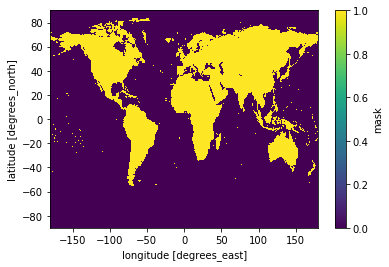

In [7]:
mask.mask.plot()

In [38]:
ds = xr.open_dataset('/scratch/dl_chapter14/org_data/koirala2017/et/full_matsiro-gw_exp3_experiment_3_1950.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 360, levelc: 13, levelf: 14, lon: 720, time: 365)
Coordinates:
  * lat        (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon        (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 1950-12-31
  * levelf     (levelf) int32 0 5 25 100 200 300 ... 600 700 800 900 1000 4000
  * levelc     (levelc) int32 5 20 75 100 100 100 100 100 100 100 100 100 3000
Data variables:
    rss        (time, lat, lon) float32 ...
    hfss       (time, lat, lon) float32 ...
    gwrec      (time, lat, lon) float32 ...
    ec         (time, lat, lon) float32 ...
    ts         (time, lat, lon) float32 ...
    hfls       (time, lat, lon) float32 ...
    et         (time, lat, lon) float32 ...
    cw         (time, lat, lon) float32 ...
    es         (time, lat, lon) float32 ...
    tsl        (time, levelc, lat, lon) float32 ...
    hfdss      (time, lat, lon) float32 ...
   

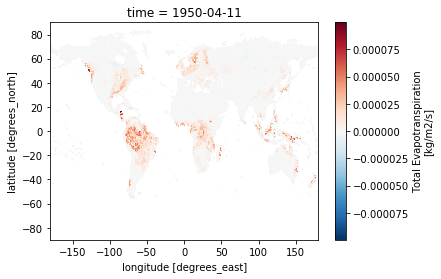

In [40]:
ds.ec.isel(time=100).plot()

In [75]:
years = range(1950, 2015)
files_out = [f'/scratch/dl_chapter14/org_data/koirala2017/et/full_matsiro-gw_exp3_experiment_3_{y}.nc' for y in years]
varnames = ["et", "tws", "mrro", "wtd", "rzwc"]

In [76]:
zarr_file = os.path.join('/scratch/dl_chapter14/', 'target/dynamic/koirala2017.zarr')

In [5]:
ds = xr.open_mfdataset(files_out, combine='nested', concat_dim='time')
ds

NameError: name 'files_out' is not defined

In [80]:
ds = ds[varnames]
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 23741)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2014-12-31
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    et       (time, lat, lon) float32 dask.array<chunksize=(365, 360, 720), meta=np.ndarray>
    tws      (time, lat, lon) float32 dask.array<chunksize=(365, 360, 720), meta=np.ndarray>
    mrro     (time, lat, lon) float32 dask.array<chunksize=(365, 360, 720), meta=np.ndarray>
    wtd      (time, lat, lon) float32 dask.array<chunksize=(365, 360, 720), meta=np.ndarray>
    rzwc     (time, lat, lon) float32 dask.array<chunksize=(365, 360, 720), meta=np.ndarray>
Attributes:
    project:      Soil Parameter Model Intercomparison Project (SP-MIP): Asse...
    experiment:   SP-MIP: Experiment No. 3
    institution:  Max-Planck-Institute for Biogeochemistry, Jena, Germany; Th...
 

In [84]:
{var: {'compressor': None} for var in varnames}

{'et': {'compressor': None},
 'tws': {'compressor': None},
 'mrro': {'compressor': None},
 'wtd': {'compressor': None},
 'rzwc': {'compressor': None}}

In [85]:
ds = ds.chunk({'time': -1, 'lat': 10, 'lon': 10})

ds.to_zarr(
    zarr_file,
    mode='w',
    encoding={var: {'compressor': None} for var in varnames})

In [ ]:
ds 

ds = xr.open_mfdataset(files_out)[var]
if 'latitude' in ds.coords:
    ds = ds.rename({'latitude': 'lat', 'longitude': 'lon'})

ds = ds.chunk({'time': -1, 'lat': chunk_size, 'lon': chunk_size})

ds.to_zarr(
    zarr_file,
    group=var,
    mode='w' if overwrite else 'a',
    encoding={var: {'compressor': None}})

In [15]:
mask = xr.open_dataset('/scratch/dl_chapter14/mask.nc')

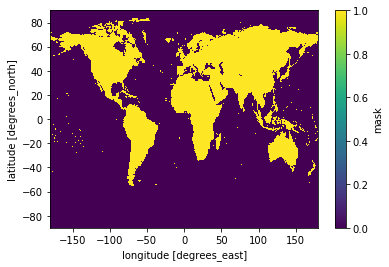

In [19]:
mask.mask.plot()

In [6]:
ds = xr.open_zarr('/scratch/dl_chapter14/target/dynamic/koirala2017.zarr/')

In [95]:


not_null = ds.notnull().all('time')
varnames = list(not_null.data_vars)
mask = not_null[varnames[0]]
for v in varnames[1:]:
    mask = mask * not_null[v]

mask = xr.Dataset({'mask': mask})

mask.to_netcdf(os.path.join('/scratch/dl_chapter14/', 'mask.nc'))

In [42]:
m_ = xr.open_dataset('/scratch/dl_chapter14/mask.nc')

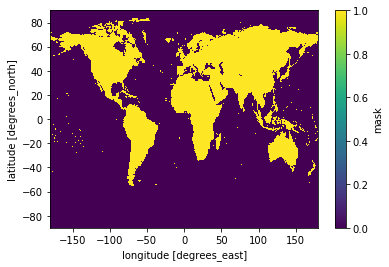

In [4]:
m_.mask.plot()

In [7]:
ds = xr.open_zarr('/scratch/dl_chapter14/target/dynamic/koirala2017.zarr/')
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 23741)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2014-12-31
Data variables:
    et       (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    mrro     (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    rzwc     (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    tws      (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    wtd      (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
Attributes:
    citation:     Koirala, Sujan, et al. Global-scale land surface hydrologic...
    contact:      Sujan Koirala <skoirala@bgc-jena.mpg.de> and Hyungjun Kim <...
    experiment:   SP-MIP: Experiment No. 3
 

In [46]:
[ds[v] for v in ds.data_vars]

['et', 'mrro', 'rzwc', 'tws', 'wtd']

['et', 'mrro', 'rzwc', 'tws', 'wtd']

In [62]:
m = ds.notnull().all('time')
varnames = list(m.data_vars)
mask = m[varnames[0]]
for v in varnames[1:]:
    mask = m[v]


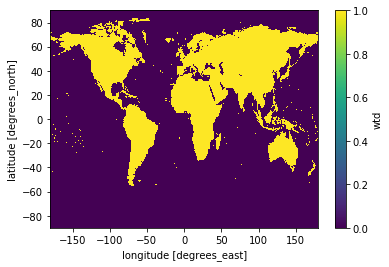

In [65]:
mask.plot()

In [9]:
mrro_null = (ds.mrro.isnull().sum('time')==0).astype(np.float32)
et_null = (ds.et.isnull().sum('time')==0).astype(np.float32)

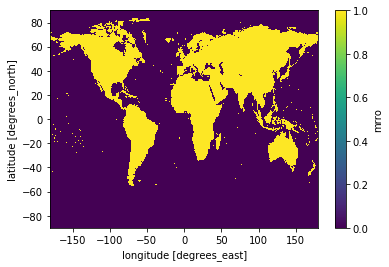

In [10]:
mrro_null.plot()

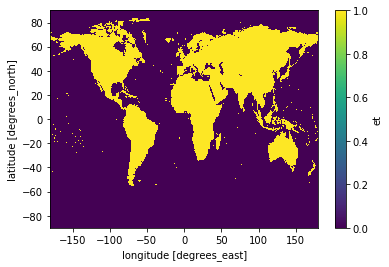

In [11]:
et_null.plot()

In [12]:
diff = mrro_null-m_.mask

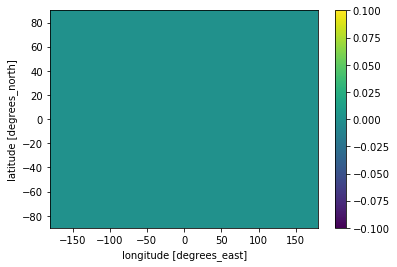

In [13]:
diff.plot()

In [14]:
np.unique(diff)

array([0.], dtype=float32)

In [89]:
import torch

In [101]:
torch.ones(5)[torch.randint(0, 2, (1, ))]

tensor([1.])

In [102]:
import json

In [ ]:
ds.isnull

In [17]:
tws = xr.open_zarr('/scratch/data/bucket.zarr/tair/').data

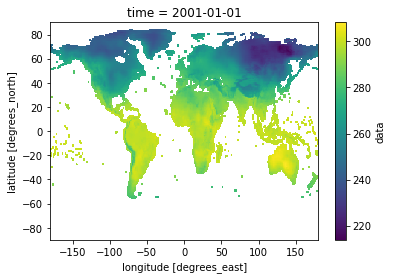

In [19]:
tws.isel(time=0).plot()

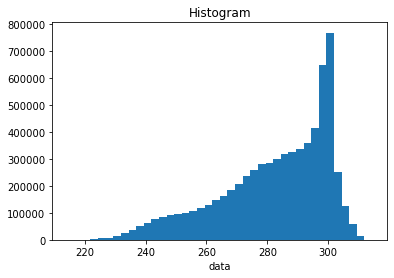

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(14, 10))
for i, y in enumerate(range(2001, 2015)):
    ax = xes.flat[i]
    tws.sel(time=slice('2003-01-01', '2003-12-31')).plot.hist(bins=40);

In [25]:
tws

<xarray.DataArray 'data' (time: 5113, lat: 180, lon: 360)>
dask.array<zarr, shape=(5113, 180, 360), dtype=float32, chunksize=(5113, 5, 5), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2014-12-31

In [48]:
m_.mask.sum()

<xarray.DataArray 'mask' ()>
array(63487)

In [50]:
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 23741)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2014-12-31
Data variables:
    et       (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    mrro     (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    rzwc     (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    tws      (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    wtd      (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
Attributes:
    citation:     Koirala, Sujan, et al. Global-scale land surface hydrologic...
    contact:      Sujan Koirala <skoirala@bgc-jena.mpg.de> and Hyungjun Kim <...
    experiment:   SP-MIP: Experiment No. 3
 

In [198]:
s0

array([[  3,   3],
       [  3,   9],
       [  3,  15],
       ...,
       [357, 705],
       [357, 711],
       [357, 717]])

In [218]:
def get_sparse_grid(x, gap_size):
    nlat = len(x.lat)
    nlon = len(x.lon)
    r = np.zeros((nlat, nlon), dtype=int)
    print(r.shape)
    
    set_0 = np.array([[x, y] for x in np.arange(0, nlat, gap_size * 2) for y in np.arange(0, nlon, gap_size * 2)])
    set_1 = np.array([[x, y] for x in np.arange(gap_size, nlat, gap_size * 2) for y in np.arange(gap_size, nlon, gap_size * 2)])
    
    for lat in np.arange(0, nlat, gap_size * 2):
        for lon in np.arange(0, nlon, gap_size * 2):
            r[lat, lon] = 1
            r[lat + gap_size, lon + gap_size] = 2

    m = xr.DataArray(r, coords=(x.lat, x.lon))
    
    return m
    

In [219]:
ds = xr.open_zarr('/scratch/dl_chapter14/input/dynamic/gswp3.zarr/LWdown/')

In [221]:
mask = get_sparse_grid(ds, 3)
mask

(360, 720)


<xarray.DataArray (lat: 360, lon: 720)>
array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8

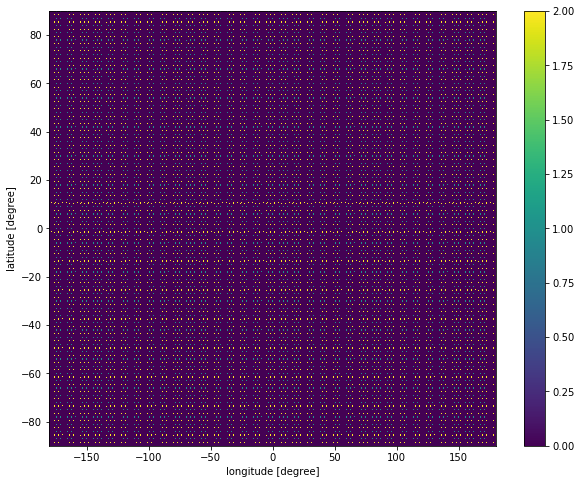

In [222]:
plt.figure(figsize=(10, 8))

# mask.isel(lat=slice(0, 40), lon=slice(0, 40)).plot.pcolormesh()
mask.plot.pcolormesh()

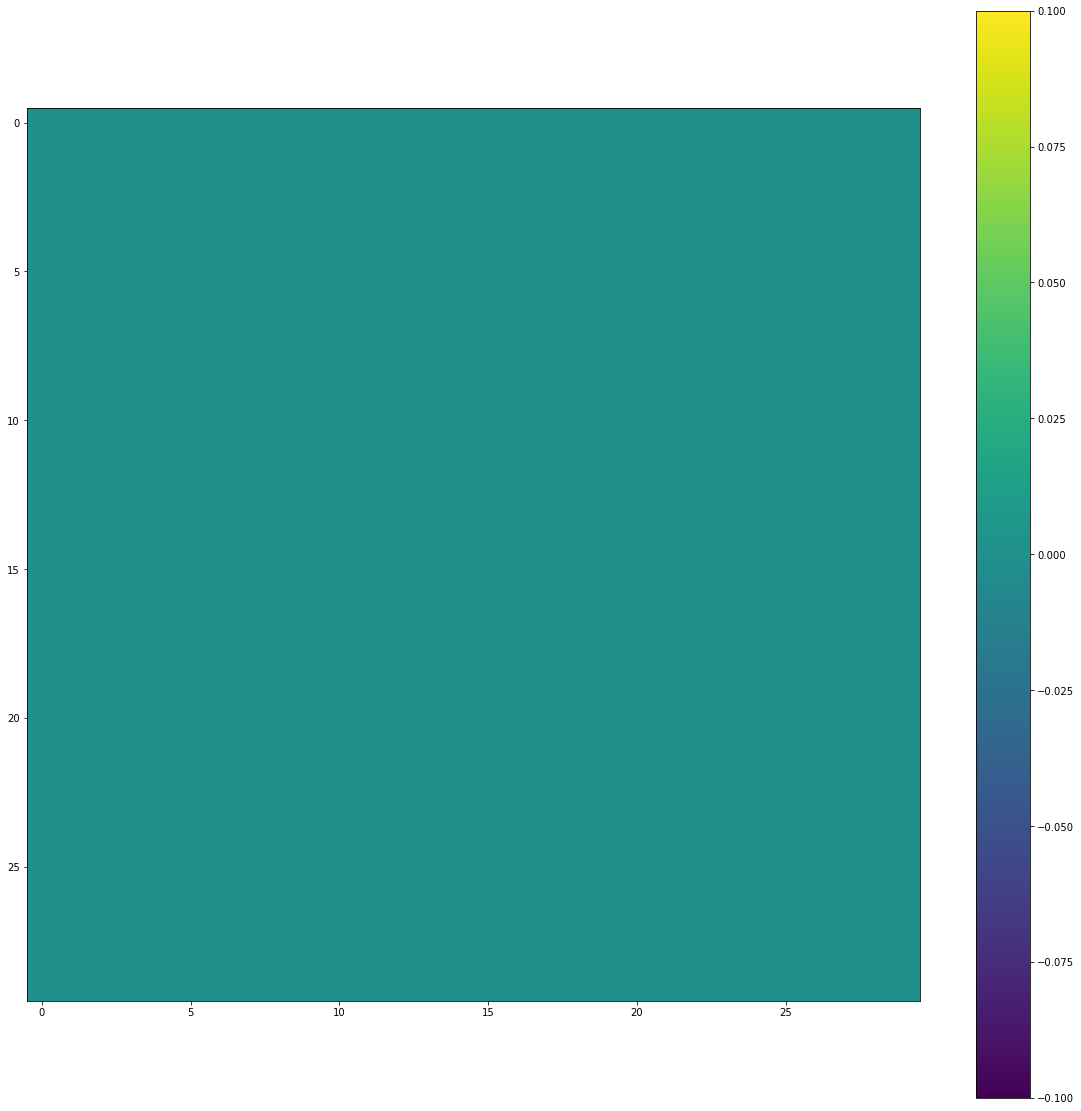

In [208]:
plt.figure(figsize=(20, 20))

plt.imshow(s0[-30:, -30:])
plt.colorbar()

In [235]:
np.isin(mask.mask, [1, 2])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [223]:
mask = xr.open_dataset('/scratch/dl_chapter14/mask.nc')

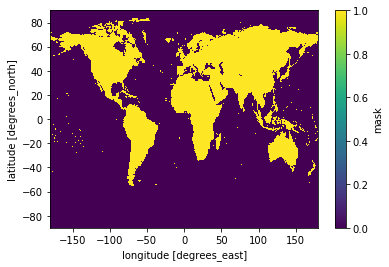

In [225]:
mask.mask.plot()

In [230]:
np.setdiff1d(np.unique([0, 1, 2, 3, 4]), 0)

array([1, 2, 3, 4])

In [2]:
import sys
sys.path.append('/workspace/bkraft/dl_chapter14/src/')

In [3]:
from data.data_loader import Data
from experiments.hydrology.experiment_config import get_search_space, get_config

In [13]:
d = Data(get_config('default'), 'test', is_tune=True)

In [11]:
z = np.zeros((360, 720))

In [14]:
for lat, lon in d.coords:
    z[lat, lon] = 2

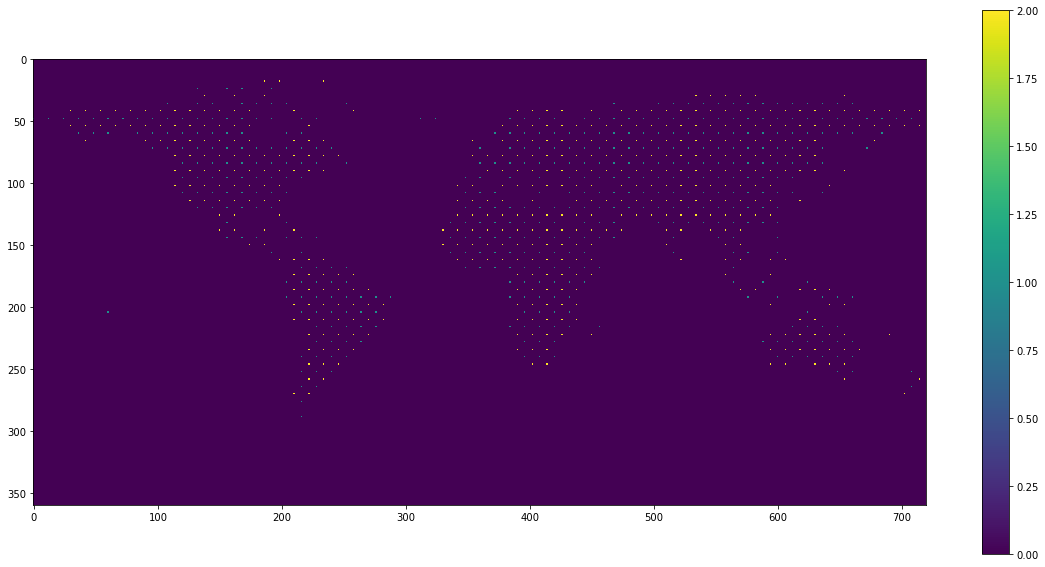

In [15]:
plt.figure(figsize=(20, 10))
plt.imshow(z)
plt.colorbar()

In [258]:
True ^ False

True

In [21]:
from ray.tune.analysis import ExperimentAnalysis
import glob

In [42]:
f = glob.glob('/scratch/dl_chapter14/experiments/hydro/default/*/experiment_state-*.json')
f = glob.glob('/workspace/hydrodl/docs/notes/*.md')
f

['/workspace/hydrodl/docs/notes/data.md',
 '/workspace/hydrodl/docs/notes/notes.md',
 '/workspace/hydrodl/docs/notes/lessions.md']

In [43]:
f = sorted(f, key=os.path.getmtime)

In [44]:
f

['/workspace/hydrodl/docs/notes/lessions.md',
 '/workspace/hydrodl/docs/notes/data.md',
 '/workspace/hydrodl/docs/notes/notes.md']

In [41]:
ls -l '/workspace/hydrodl/docs/notes/'

total 48
drwxrwxr-- 3 bkraft     521  13 Jul  4 12:46 RNNvsTCN/
-rw-r--r-- 1 bkraft nogroup 367 Sep 24 10:40 data.md
drwxr-xr-x 2 bkraft nogroup  16 Oct  2 08:18 hybrid_model/
drwxrwxr-- 2 bkraft     521  12 Jul  4 12:46 imgs/
-rw-rw-r-- 1 bkraft     521 889 Jul  4 12:46 lessions.md
drwxr-xr-x 2 bkraft nogroup  10 Oct  2 08:18 multitask_model/
-rw-r--r-- 1 bkraft nogroup 541 Sep 24 10:40 notes.md


In [20]:
t = ExperimentAnalysis('/scratch/dl_chapter14/experiments/hydro/default/hydro/experiment_state-2019-10-21_13-33-22.json')

IsADirectoryError: [Errno 21] Is a directory: '/scratch/dl_chapter14/experiments/hydro/default/hydro/'

In [19]:
'/scratch/dl_chapter14/experiments/hydro/default/'

In [46]:
exp_file = '/scratch/dl_chapter14/experiments/hydro/default/hydro/experiment_state-2019-10-21_13-33-22.json'

In [51]:
os.path.split(os.path.dirname(exp_file))[0]

'/scratch/dl_chapter14/experiments/hydro/default'

In [53]:
10e10

100000000000.0

In [248]:
True == 1

True